##OOP2 Homework 3
###Anishka Chaudhari
### RUID: 212003779

Q.1
Create a class named “Player” that initiates a player with default name as “player”, default level as 0, and default
character type as “default”. Create a function that compares two players' levels and prints the players name, level,
and character type that has the higher level. If both characters are the same level print “tie”. Write a main program
that creates and compares two instances created with random levels 1-99.

In [ ]:
import random

class Player:
    def __init__(self, name="player", level=0, char_type="default"):
        self.name = name
        self.level = level
        self.char_type = char_type

    def compare_levels(self, other):
        if self.level > other.level:
            print(f"{self.name} ({self.char_type}) has a higher level ({self.level}) than {other.name} ({other.char_type}) ({other.level})")
        elif self.level < other.level:
            print(f"{other.name} ({other.char_type}) has a higher level ({other.level}) than {self.name} ({self.char_type}) ({self.level})")
        else:
            print("tie")

player1 = Player("Player 1", random.randint(1, 99))
player2 = Player("Player 2", random.randint(1, 99))
player1.compare_levels(player2)


Player 2 (default) has a higher level (92) than Player 1 (default) (54)


Q.2
Assume there are N students, S1, S2, ..., SN with student IDs 1, 2, ..., N, and M seats available in a classroom with
N <= M. Generate a random seating assignment with the random module to spread the students out as much as
possible. For simplicity, you can assume the layout for all the seats is one-dimensional (or linear).
A sample output looks like
Number of students: 7
Number of seats: 20
[1, '_', '_', 3, '_', '_', '_', 4, '_', '_', 2, '_', '_', 6, '_', '_', 7, '_', '_', 5]
but you can provide the output in your desired format.
Do not use pseudo random number. Also provide a function named findSeat which takes a student ID as input
(thus an integer between 1 and N) and output the seat number (an integer between 1 and M) assigned to the student

In [ ]:
import random

classroom = []

def randomSeating(N, M):
    global classroom
    if N > M:
        print("Error: Number of students cannot be greater than the number of seats!")
        return
    students = list(range(1, N+1))
    seats = ['_'] * M
    for student in students:
        seat = random.randint(0, M-1)
        while seats[seat] != '_':
            seat = random.randint(0, M-1)
        seats[seat] = student
    classroom = seats
    print(f"Number of students: {N}")
    print(f"Number of seats: {M}")
    print(classroom)

def findSeat(studentID):
    global classroom
    try:
        seat = classroom.index(studentID) + 1
        print(f"Seat assigned to student {studentID}: {seat}")
    except ValueError:
        print(f"Error: Student {studentID} is not assigned a seat.")

randomSeating(7, 20)
findSeat(3)


Number of students: 7
Number of seats: 20
['_', '_', '_', '_', '_', 3, '_', '_', '_', 6, 5, 2, '_', '_', 1, 4, '_', 7, '_', '_']
Seat assigned to student 3: 6


Q.3
File Concatenation: Many operating systems allow one to concatenate files. Design a class called
TextDocument that reads the contents of a text file only. Create a constructor that takes the path of a text file.
Create an overloaded addition operator for this class that adds (concatenates) two TextDocument objects
(appends the second one at the end of the first one) and creates a new text file. Handle all possible error cases, such
as for file existence.

In [3]:
#Mount drive
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive')

class TextDocument:
    def __init__(self, path):
        self.path = path
    
    def __add__ (self, other):
        try:
            with open(self.path, 'r') as file1:
                content1 = file1.read()
            with open(other.path, 'r') as file2:
                content2 = file2.read()
            new_path = self.path + '_concatenated.txt'
            with open(new_path, 'w') as new_file:
                new_file.write(content1 + content2)
            return TextDocument(new_path)
        except FileNotFoundError:
            print("Error: One or both input files do not exist.")
        except:
            print("Error: An unexpected error occurred.")


doc1 = TextDocument('file1.txt')
doc2 = TextDocument('file2.txt')
doc1 + doc2   


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


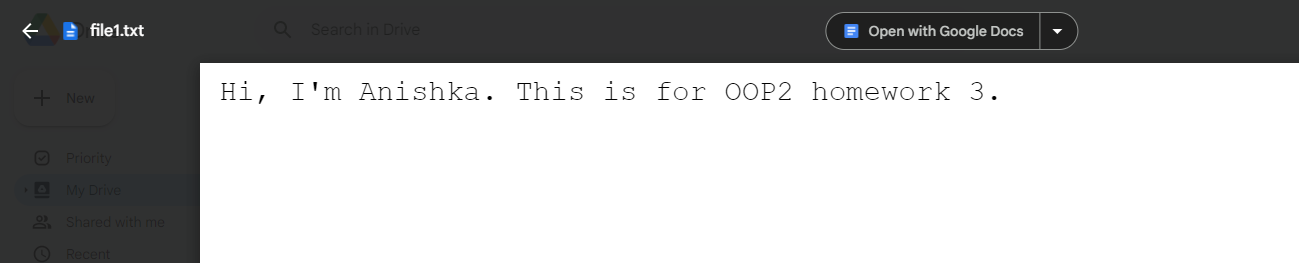

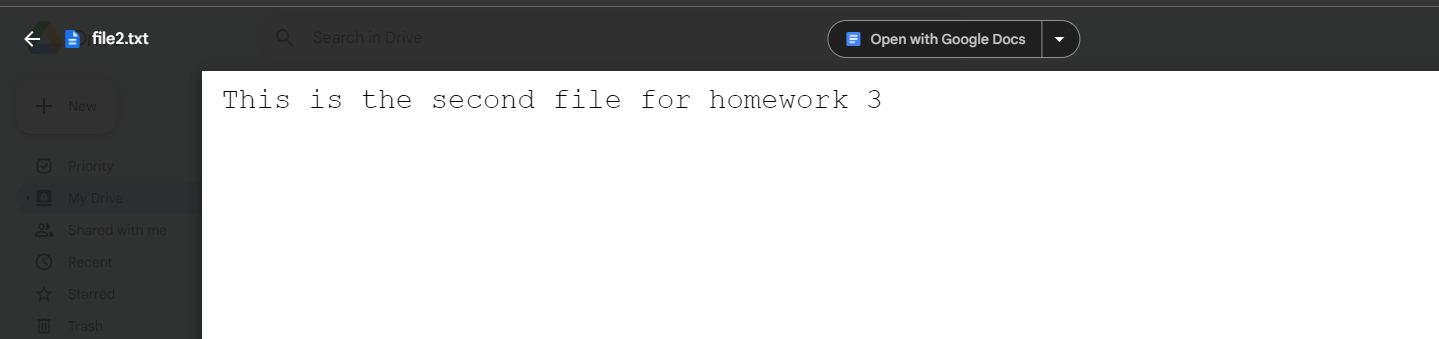

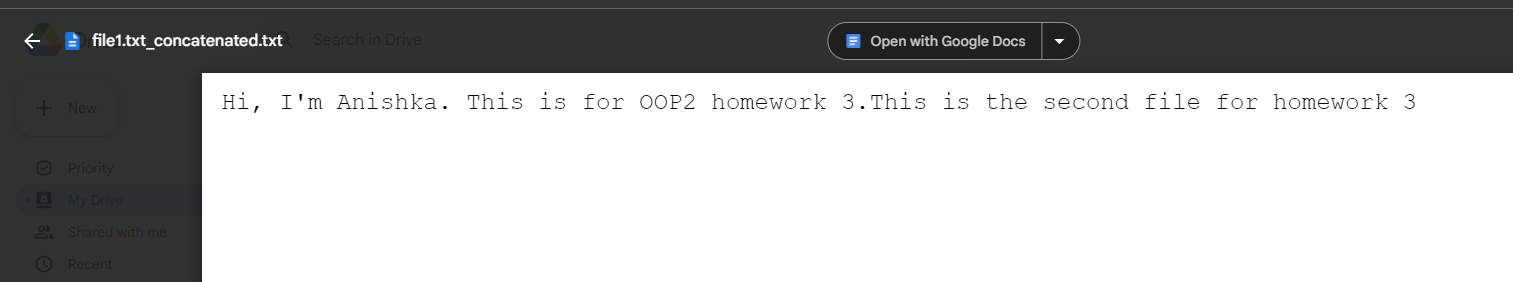

Q.4
Design a class called Color. The fields of the class are three decimals for Red, Green, and Blue components in
the range 0 to 1, inclusive (0 indicates Black and 1 indicates White). Add checks to ensure that the values are
always in the given range. Provide addition and subtraction operators for the color class. Include saturation in the
addition and subtraction: if any component goes less than 0 or greater than 1, assign them 0 or 1, respectively.

In [4]:
class Color:
    def __init__(self, red=0, green=0, blue=0):
        self.red = max(0, min(1, red))
        self.green = max(0, min(1, green))
        self.blue = max(0, min(1, blue))

    def __add__(self, other):
        r = self.red + other.red
        g = self.green + other.green
        b = self.blue + other.blue
        return Color(r, g, b)

    def __sub__(self, other):
        r = self.red - other.red
        g = self.green - other.green
        b = self.blue - other.blue
        return Color(r, g, b)

    def __str__(self):
        return f"({self.red:.2f}, {self.green:.2f}, {self.blue:.2f})"

c1 = Color(0.5, 0.2, 0.8)
c2 = Color(0.3, 0.7, 0.4)
c3 = c1 + c2
print(c3)
c4 = c1 - c2
print(c4)


(0.80, 0.90, 1.00)
(0.20, 0.00, 0.40)


Q.5
Design a Logarithm class. Fields should be the base and number. Provide addition and subtraction operators—
remember to adjust bases appropriately. Hint: Use base 2 or 10 as a canonical base for operations.

In [5]:
import math

class Logarithm:
    def __init__(self, number=0, base=10):
        self.number = number
        self.base = base

    def __add__(self, other):
        if self.base == other.base:
            result_number = self.number + other.number
            return Logarithm(result_number, self.base)
        else:
            result_number = self.number / math.log(self.base) + other.number / math.log(other.base)
            result_base = math.e
            return Logarithm(result_number, result_base)

    def __sub__(self, other):
        if self.base == other.base:
            result_number = self.number - other.number
            return Logarithm(result_number, self.base)
        else:
            result_number = self.number / math.log(self.base) - other.number / math.log(other.base)
            result_base = math.e
            return Logarithm(result_number, result_base)

    def __str__(self):
        return f"log{self.base}({self.number})"


log1 = Logarithm(100, 10)
log2 = Logarithm(2, 2)
log3 = log1 + log2
print(log3)
log4 = log1 - log2
print(log4)


log2.718281828459045(46.31483827210311)
log2.718281828459045(40.544058108547254)


Q.6
Augment the Rational number class in the textbook to include multiplication and division. Include the ability to
accommodate operands of type int.

In [6]:
class Rational:
    def __init__(self, numer, denom=1):
        if denom == 0:
            raise ValueError("Denominator cannot be zero.")
        if isinstance(numer, int) and isinstance(denom, int):
            common_divisor = math.gcd(numer, denom)
            self.numer = numer // common_divisor
            self.denom = denom // common_divisor
        else:
            self.numer = numer
            self.denom = denom

    def __add__(self, other):
        numer = self.numer * other.denom + other.numer * self.denom
        denom = self.denom * other.denom
        return Rational(numer, denom)

    def __sub__(self, other):
        numer = self.numer * other.denom - other.numer * self.denom
        denom = self.denom * other.denom
        return Rational(numer, denom)

    def __mul__(self, other):
        numer = self.numer * other.numer
        denom = self.denom * other.denom
        return Rational(numer, denom)

    def __truediv__(self, other):
        if other.numer == 0:
            raise ValueError("Cannot divide by zero.")
        numer = self.numer * other.denom
        denom = self.denom * other.numer
        return Rational(numer, denom)

    def __str__(self):
        if self.denom == 1:
            return str(self.numer)
        else:
            return f"{self.numer}/{self.denom}"


r1 = Rational(3, 4)
r2 = Rational(1, 2)
r3 = r1 + r2
print(r3)  # prints 5/4
r4 = r1 - r2
print(r4)  # prints 1/4
r5 = r1 * r2
print(r5)  # prints 3/8
r6 = r1 / r2
print(r6)  # prints 3/2
r7 = Rational(6)  # equivalent to 6/1
r8 = Rational(0, 5)  # raises ValueError


5/4
1/4
3/8
3/2


Q.7
Write an Odometer class. An odometer is the gauge on your car that measures distance traveled. In the United
States, an odometer measures miles; elsewhere, it measures kilometers. Many vehicles with electronic odometer
interfaces have the ability to switch between miles and kilometers. The accuracy is 1/10 of a mile (kilometer).
Something to consider: if an odometer gets replaced, a new one must be able to be set to some specified mileage.
Include the following methods:
(a) __init__, __str__, __repr__.
(b) The constructor must take two arguments that both have default values: one is mileage, and the other
specifies units.
(c) Addition and subtraction both have one odometer operand and one numeric operand, where the
numeric operand represents the miles being added/subtracted (not two odometer operands).
(d) Addition should be commutative (but not subtraction).
(e) Output should always be rounded to a 1/10 of a mile (kilometer), but the odometer itself should maintain
full floating-point accuracy.
Include sample code that uses your class and demonstrates the use of all methods as well as demonstrating error
handling.

In [8]:
class Odometer:
    MILE_TO_KM = 1.60934

    def __init__(self, mileage=0, units='miles'):
        if units not in ('miles', 'kilometers'):
            raise ValueError("Units must be 'miles' or 'kilometers'.")
        if mileage < 0:
            raise ValueError("Mileage cannot be negative.")
        self._mileage = mileage if units == 'miles' else mileage / self.MILE_TO_KM
        self._units = units

    def __str__(self):
        return f"{self._mileage:.1f} {self._units}"

    def __repr__(self):
        return f"Odometer({self._mileage}, '{self._units}')"

    def __add__(self, other):
        if isinstance(other, (int, float)):
            mileage = self._mileage + other
            return Odometer(mileage, self._units)
        elif isinstance(other, Odometer):
            if self._units != other._units:
                other_mileage = other._mileage * self.MILE_TO_KM if self._units == 'miles' else other._mileage / self.MILE_TO_KM
            else:
                other_mileage = other._mileage
            mileage = self._mileage + other_mileage
            return Odometer(mileage, self._units)
        else:
            raise TypeError("Unsupported operand type.")

    def __sub__(self, other):
        if isinstance(other, (int, float)):
            mileage = self._mileage - other
            return Odometer(mileage, self._units)
        elif isinstance(other, Odometer):
            if self._units != other._units:
                other_mileage = other._mileage * self.MILE_TO_KM if self._units == 'miles' else other._mileage / self.MILE_TO_KM
            else:
                other_mileage = other._mileage
            mileage = self._mileage - other_mileage
            return Odometer(mileage, self._units)
        else:
            raise TypeError("Unsupported operand type.")


o1 = Odometer(100)
print(o1) 

o2 = o1 + 25
print(o2) 

o3 = o1 + 50.5
print(o3) 

100.0 miles
125.0 miles
150.5 miles


Q.8
Write a Clock class that measures hours, minutes, and seconds.
Include the following methods:
(a) __init__, __str__, __repr__.
(b) Addition allows for both clock-to-clock operations and clock-to-integer operations. If one argument
is an integer, the integer is assumed to represent hours. Addition should be commutative!
(c) Output should always be rounded to the second.
(d) If inappropriate values are passed to the constructor, the created clock instance should get a value of 0 hours,
0 minutes, and 0 seconds.
Include sample code that uses your class and demonstrates the use of all methods as well as error handling.

In [13]:
class Clock:
    def __init__(self, hours=0, minutes=0, seconds=0):
        self.hours = 0
        self.minutes = 0
        self.seconds = 0
        self.set_time(hours, minutes, seconds)
    
    def __str__(self):
        return "{:02d}:{:02d}:{:02d}".format(self.hours, self.minutes, self.seconds)
    
    def __repr__(self):
        return "Clock({}, {}, {})".format(self.hours, self.minutes, self.seconds)
    
    def set_time(self, hours, minutes, seconds):
        if 0 <= hours < 24:
            self.hours = hours
        if 0 <= minutes < 60:
            self.minutes = minutes
        if 0 <= seconds < 60:
            self.seconds = seconds
    
    def add_time(self, other):
        if isinstance(other, Clock):
            hours = self.hours + other.hours
            minutes = self.minutes + other.minutes
            seconds = self.seconds + other.seconds
        elif isinstance(other, int):
            hours = self.hours + other
            minutes = self.minutes
            seconds = self.seconds
        else:
            raise TypeError(f"unsupported operand type(s) for 'Clock' and '{type(other).__name__}'")
        
        if seconds >= 60:
            minutes += 1
            seconds -= 60
        if minutes >= 60:
            hours += 1
            minutes -= 60
        hours %= 24
        
        return Clock(hours, minutes, seconds)
        

c1 = Clock(8, 30, 45)
print(c1) 
c2 = Clock(1, 15, 0)
print(c2)  

c3 = c1.add_time(c2)
print(c3) 

c4 = c1.add_time(2)
print(c4)  



08:30:45
01:15:00
09:45:45
10:30:45
